<a href="https://colab.research.google.com/github/Shridat/Mobile-Price-Clasiification/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data.shape

(2000, 21)

In [4]:
num_cols = data.select_dtypes(np.number).columns.tolist()
cat_cols = data.select_dtypes('object').columns.tolist()
print(num_cols)
print(cat_cols)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
[]


In [5]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [6]:
data['price_range'].unique()

array([1, 2, 3, 0])

In [7]:
total = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum())/(data.isnull().count())).sort_values(ascending=False)
missing_values = pd.concat([total,percentage],keys=['Total','Percentage'],axis=1)
missing_values

,Total,Percentage
battery_power,0,0.0
px_height,0,0.0
wifi,0,0.0
touch_screen,0,0.0
three_g,0,0.0
talk_time,0,0.0
sc_w,0,0.0
sc_h,0,0.0
ram,0,0.0
px_width,0,0.0


In [8]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 21 entries, battery_power to price_range
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [10]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [11]:
corr = data.corr()


In [12]:
corr['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

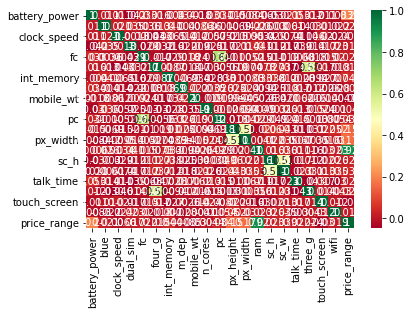

In [13]:
c = sns.heatmap(corr,annot=True,cmap="RdYlGn")

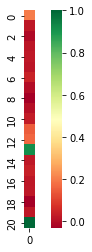

In [14]:
price = np.asarray([corr['price_range']]).reshape(corr['price_range'].shape[0],1)
sns.heatmap(price,cmap="RdYlGn",square=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


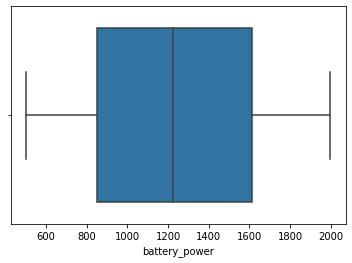

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


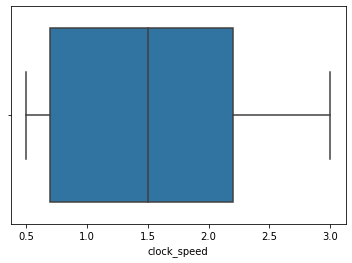

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


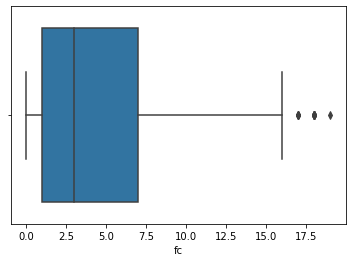

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


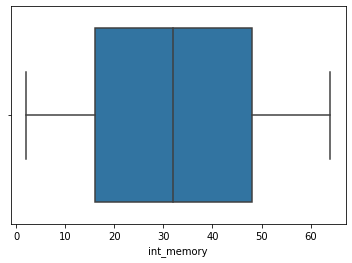

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


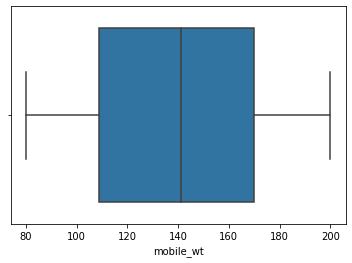

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


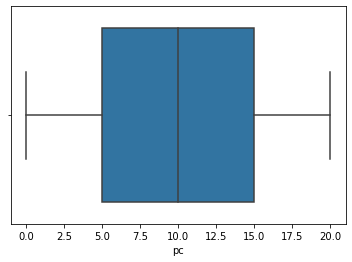

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


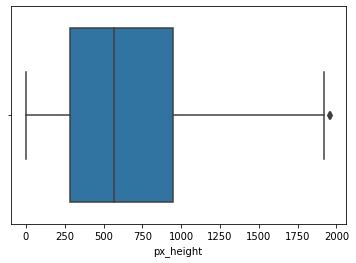

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


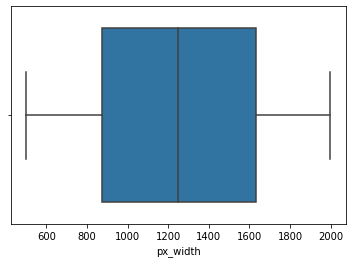

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


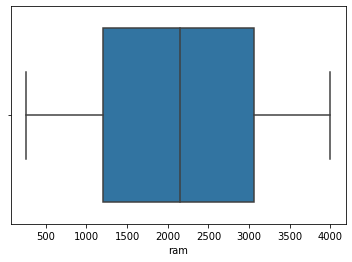

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


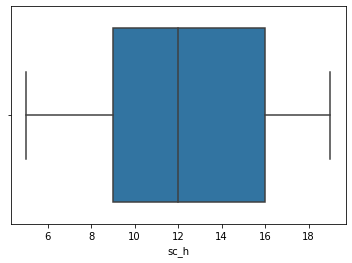

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


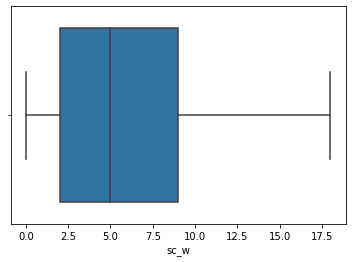

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


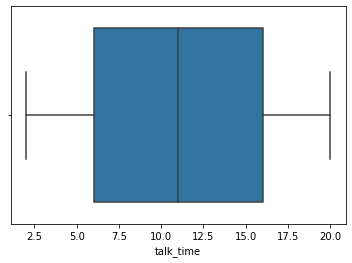

In [15]:
cols = ['battery_power','clock_speed','fc','int_memory','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
for col in cols:
  sns.boxplot(data[col])
  plt.show()

In [16]:
X = data.drop(['price_range'],axis=1)
Y = data['price_range']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=42)

In [18]:
model_accuracy={}

**Logistic Regression using One vs Rest**

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class="ovr")
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(multi_class='ovr')

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
pred = lr.predict(x_test)
print(accuracy_score(y_test,pred))


0.7166666666666667


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        80
           1       0.62      0.56      0.59        72
           2       0.64      0.47      0.54        68
           3       0.72      0.91      0.80        80

    accuracy                           0.72       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.71      0.72      0.71       300



Text(33.0, 0.5, 'Predicted Values')

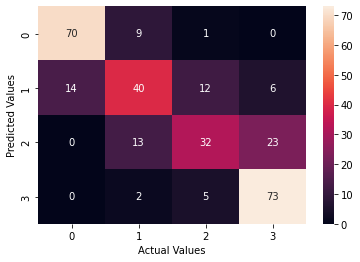

In [22]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

**Logistic Regression after Standerdization**

In [23]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()

In [24]:
x_std = stsc.fit_transform(X[cols])
rem_cols = X.drop(cols,axis=1)
x_std=pd.DataFrame(x_std,columns=cols)

In [25]:
x_std = pd.concat([x_std,rem_cols],axis=1)

In [26]:
x_std_train,x_std_test,y_train,y_test = train_test_split(x_std,Y,test_size=0.15,random_state=42)

In [27]:
lr.fit(x_std_train,y_train)
pred = lr.predict(x_std_test)

In [28]:
ac = accuracy_score(y_test,pred)
print(ac)

0.87


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        80
           1       0.82      0.69      0.75        72
           2       0.75      0.75      0.75        68
           3       0.93      1.00      0.96        80

    accuracy                           0.87       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.87      0.87      0.87       300



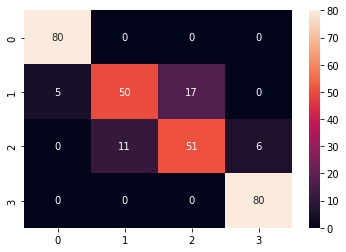

In [30]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [31]:
model_accuracy['LogisticRegression']=ac

**KNeigbourNearest Classifier and Normalization**

In [32]:
from sklearn.preprocessing import MinMaxScaler
mnmx = MinMaxScaler()

In [33]:
X_norm = mnmx.fit_transform(X[cols])
X_norm = pd.DataFrame(X_norm,columns=cols)
X_norm = pd.concat([X_norm,rem_cols],axis=1)
X_norm

,battery_power,clock_speed,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,m_dep,n_cores,three_g,touch_screen,wifi
0,0.227789,0.68,0.052632,0.080645,0.900000,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,0,0.6,2,0,0,1
1,0.347361,0.00,0.000000,0.822581,0.466667,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,1,0.7,3,1,1,0
2,0.041416,0.00,0.105263,0.629032,0.541667,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,1,0.9,5,1,1,0
3,0.076152,0.80,0.000000,0.129032,0.425000,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,0.8,6,1,0,0
4,0.881764,0.28,0.684211,0.677419,0.508333,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,0,1,0.6,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.000000,0.000000,0.216667,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1,1,1,0.8,6,1,1,0
1996,0.977956,0.84,0.000000,0.596774,0.891667,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1,1,0,0.2,4,1,1,1
1997,0.941884,0.16,0.052632,0.548387,0.233333,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,0,1,1,0.7,8,1,1,0
1998,0.675351,0.16,0.210526,0.709677,0.541667,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,0,0,1,0.1,5,1,1,1


In [34]:
x_norm_train,x_norm_test,y_train,y_test = train_test_split(X_norm,Y,test_size=0.15,random_state=42)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [36]:
#fitiing data with KNN
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,pred))

Accuracy_score 0.93


In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        80
           1       0.92      0.94      0.93        72
           2       0.90      0.88      0.89        68
           3       0.94      0.93      0.93        80

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [38]:
#fitting Scaled Data with KNN
knn.fit(x_std_train,y_train)
pred = knn.predict(x_std_test)
print(accuracy_score(y_test,pred))

0.53


In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66        80
           1       0.37      0.42      0.39        72
           2       0.36      0.44      0.39        68
           3       0.76      0.62      0.68        80

    accuracy                           0.53       300
   macro avg       0.55      0.52      0.53       300
weighted avg       0.56      0.53      0.54       300



In [40]:
#fitting with Normalized data
knn.fit(x_norm_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
pred = knn.predict(x_norm_test)
pred

array([0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 3, 2, 1, 3, 3, 0, 1, 0, 3,
       0, 2, 0, 2, 2, 3, 3, 1, 0, 0, 1, 1, 3, 3, 0, 0, 1, 0, 3, 3, 3, 1,
       3, 0, 1, 1, 3, 0, 3, 3, 3, 2, 2, 0, 0, 2, 2, 0, 1, 3, 1, 2, 1, 0,
       2, 3, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 3, 1, 2, 3, 1, 2,
       3, 1, 1, 2, 3, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 3, 2, 0, 1, 2,
       0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 2, 0, 3,
       1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 3, 2, 0, 0, 1, 0, 3, 2, 3, 0, 3, 1,
       2, 1, 0, 0, 2, 2, 0, 3, 3, 1, 1, 0, 1, 3, 3, 1, 2, 1, 2, 1, 3, 2,
       3, 0, 1, 2, 2, 2, 2, 2, 3, 2, 2, 0, 0, 0, 2, 1, 3, 3, 1, 3, 0, 0,
       1, 0, 2, 1, 3, 0, 3, 2, 0, 0, 2, 2, 1, 0, 3, 2, 2, 3, 0, 1, 3, 1,
       0, 1, 3, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 3, 1, 1, 0, 2, 2,
       1, 3, 0, 2, 2, 1, 1, 0, 3, 0, 3, 2, 1, 1, 2, 2, 1, 2, 2, 0, 3, 2,
       1, 0, 3, 2, 2, 3, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0, 3, 0, 1, 1, 0, 2,
       1, 3, 3, 0, 0, 1, 1, 2, 2, 2, 1, 1, 3, 3])

In [42]:
print(accuracy_score(y_test,pred))

0.34


In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.44      0.45      0.45        80
           1       0.22      0.25      0.24        72
           2       0.26      0.29      0.28        68
           3       0.45      0.35      0.39        80

    accuracy                           0.34       300
   macro avg       0.35      0.34      0.34       300
weighted avg       0.35      0.34      0.34       300



In [44]:
print(confusion_matrix(y_test,pred))

[[36 25 14  5]
 [20 18 18 16]
 [15 20 20 13]
 [10 18 24 28]]


**Hyperparameter Tunning**

In [45]:
accuracy_rate=[]
for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred = knn.predict(x_test)
  accuracy_rate.append(accuracy_score(y_test,pred))

Text(0, 0.5, 'Accuracy Rate')

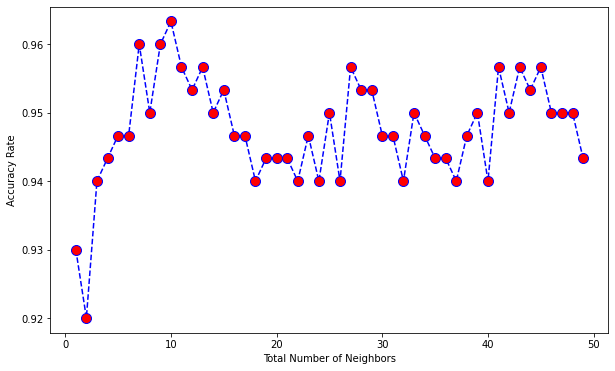

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy_rate,linestyle="dashed",marker='o',markerfacecolor="red",color="blue",markersize=10)
plt.xlabel("Total Number of Neighbors")
plt.ylabel("Accuracy Rate")

*after n_neighbor=27, there is consitency in accuracy_rate. Accuracy_rate lies between 0.94 to 0.96. So will choose that value*

In [47]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
ac_knn = accuracy_score(y_test,pred)
print(ac_knn)

0.9566666666666667


In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.93      0.97      0.95        72
           2       0.91      0.93      0.92        68
           3       0.99      0.94      0.96        80

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



Text(33.0, 0.5, 'Predicted Values')

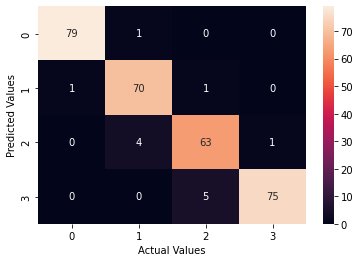

In [49]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [50]:
model_accuracy['KNeighborsClassifier'] = ac_knn

In [51]:
model_accuracy

{'KNeighborsClassifier': 0.9566666666666667, 'LogisticRegression': 0.87}

**Support Vector Classifier**

In [52]:
from sklearn.svm import SVC


In [53]:
svc = SVC(kernel="linear",C=1,gamma=1)
svc.fit(x_train,y_train)

SVC(C=1, gamma=1, kernel='linear')

In [54]:
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred))

0.9666666666666667


In [55]:
svc.support_vectors_

array([[1.681e+03, 1.000e+00, 2.500e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [5.040e+02, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.944e+03, 0.000e+00, 6.000e-01, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.492e+03, 1.000e+00, 1.500e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [6.890e+02, 0.000e+00, 1.400e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [6.870e+02, 1.000e+00, 1.300e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [56]:
svc.n_support_

array([10, 24, 30, 11], dtype=int32)

In [57]:
svc.fit(x_std_train,y_train)
pred = svc.predict(x_std_test)
ac_svc = accuracy_score(y_test,pred)
print(ac_svc)

0.9733333333333334


In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        80
           1       0.91      1.00      0.95        72
           2       1.00      0.97      0.99        68
           3       0.99      1.00      0.99        80

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.98      0.97      0.97       300



In [59]:
svc.fit(x_norm_train,y_train)
pred = svc.predict(x_norm_test)
print(accuracy_score(y_test,pred))

0.9666666666666667


In [60]:
model_accuracy['SVC'] = ac_svc

**Random Forest Classifier**

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [62]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_depth = [int(x) for x in np.linspace(5,30,6)]
max_features = ['auto','sqrt','log2','none']
min_sample_split = [2, 5, 10, 15, 100]
min_sample_leaf = [1, 2, 5, 10]

In [63]:
param_grid={
    'n_estimators': n_estimators,
    'max_depth' : max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_sample_leaf,
    'min_samples_split':min_sample_split

}

In [64]:
rf = RandomForestClassifier()

In [65]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test,pred))
print("---------------------")
print(classification_report(y_test,pred))
print("----------------------")
print(confusion_matrix(y_test,pred))

0.8733333333333333
---------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        80
           1       0.85      0.88      0.86        72
           2       0.78      0.78      0.78        68
           3       0.90      0.88      0.89        80

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

----------------------
[[76  4  0  0]
 [ 4 63  5  0]
 [ 0  7 53  8]
 [ 0  0 10 70]]


In [66]:
rf.fit(x_std_train,y_train)
pred = rf.predict(x_std_test)
print(accuracy_score(y_test,pred))
print("------------------------")
print(classification_report(y_test,pred))
print("------------------------")
print(confusion_matrix(y_test,pred))

0.8733333333333333
------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        80
           1       0.84      0.86      0.85        72
           2       0.81      0.76      0.79        68
           3       0.90      0.90      0.90        80

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

------------------------
[[76  4  0  0]
 [ 6 62  4  0]
 [ 0  8 52  8]
 [ 0  0  8 72]]


In [67]:
rf.fit(x_norm_train,y_train)
pred = rf.predict(x_norm_test)
print(accuracy_score(y_test,pred))
print("------------------------")
print(classification_report(y_test,pred))
print("------------------------")
print(confusion_matrix(y_test,pred))

0.8766666666666667
------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        80
           1       0.86      0.83      0.85        72
           2       0.78      0.82      0.80        68
           3       0.92      0.89      0.90        80

    accuracy                           0.88       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.88      0.88      0.88       300

------------------------
[[76  4  0  0]
 [ 5 60  7  0]
 [ 0  6 56  6]
 [ 0  0  9 71]]


In [68]:
random_rf = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,scoring="accuracy",cv=5,n_iter=10,verbose=2,random_state=42,n_jobs=-1)

In [69]:
random_rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         'none'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [70]:
random_rf.best_params_

{'max_depth': 25,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 1100}

In [71]:
random_rf.best_score_

0.871764705882353

In [72]:
random_rf.best_estimator_

RandomForestClassifier(max_depth=25, max_features='log2', min_samples_leaf=2,
                       min_samples_split=15, n_estimators=1100)

In [73]:
RF_model = RandomForestClassifier(max_depth=25, max_features='log2', min_samples_leaf=2,
                       min_samples_split=15, n_estimators=1100)

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
score = cross_val_score(RF_model,X,Y,cv=10)
score

array([0.89 , 0.87 , 0.89 , 0.87 , 0.89 , 0.92 , 0.87 , 0.855, 0.845,
       0.88 ])

In [76]:
score.mean()

0.8779999999999999

In [77]:
model_accuracy['RandomForestClassifier'] = score.mean()

In [78]:
model_accuracy

{'KNeighborsClassifier': 0.9566666666666667,
 'LogisticRegression': 0.87,
 'RandomForestClassifier': 0.8779999999999999,
 'SVC': 0.9733333333333334}

In [79]:
import xgboost

In [80]:
xgb = xgboost.XGBClassifier()

In [81]:
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print(accuracy_score(y_test,pred))
print("------------------------")
print(classification_report(y_test,pred))
print("------------------------")
print(confusion_matrix(y_test,pred))

0.8966666666666666
------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        80
           1       0.89      0.88      0.88        72
           2       0.82      0.87      0.84        68
           3       0.93      0.89      0.91        80

    accuracy                           0.90       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.90      0.90      0.90       300

------------------------
[[76  4  0  0]
 [ 5 63  4  0]
 [ 0  4 59  5]
 [ 0  0  9 71]]


In [82]:
xgb.fit(x_std_train,y_train)
pred = xgb.predict(x_std_test)
print(accuracy_score(y_test,pred))
print("------------------------")
print(classification_report(y_test,pred))
print("------------------------")
print(confusion_matrix(y_test,pred))

0.8966666666666666
------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        80
           1       0.89      0.88      0.88        72
           2       0.82      0.87      0.84        68
           3       0.93      0.89      0.91        80

    accuracy                           0.90       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.90      0.90      0.90       300

------------------------
[[76  4  0  0]
 [ 5 63  4  0]
 [ 0  4 59  5]
 [ 0  0  9 71]]


In [83]:
params = {
    'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth' : [int(x) for x in np.linspace(5,30,6)],
    'gamma' : [0.0,0.1,0.2,0.3,0.4,0.5],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    'colsample_bytree' : [0.3,0.5,0.7,0.9,1]
}

In [84]:
random_xgb = RandomizedSearchCV(estimator=xgb,param_distributions=params,scoring="accuracy",n_iter=10,cv=5,n_jobs=-1,random_state=42,verbose=3)

In [85]:
random_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softprob'),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7, 0.9,
                                                             1],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=42, scoring='accuracy', verbose=3)

In [86]:
random_xgb.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 20,
 'min_child_weight': 7}

In [87]:
random_xgb.best_score_

0.9029411764705882

In [88]:
random_xgb.best_estimator_

XGBClassifier(colsample_bytree=0.9, gamma=0.2, max_depth=20, min_child_weight=7,
              objective='multi:softprob')

In [89]:
xgb_model = xgboost.XGBClassifier(colsample_bytree=0.9, gamma=0.2, max_depth=20, min_child_weight=7,
              objective='multi:softprob')

In [90]:
score = cross_val_score(xgb_model,X,Y,cv=10)
score

array([0.905, 0.925, 0.93 , 0.93 , 0.94 , 0.92 , 0.905, 0.905, 0.895,
       0.875])

In [91]:
score.mean()

0.913

In [92]:
model_accuracy['XGBClassifier'] = score.mean()

In [93]:
model_accuracy

{'KNeighborsClassifier': 0.9566666666666667,
 'LogisticRegression': 0.87,
 'RandomForestClassifier': 0.8779999999999999,
 'SVC': 0.9733333333333334,
 'XGBClassifier': 0.913}

In [98]:
list(model_accuracy.keys())

['LogisticRegression',
 'KNeighborsClassifier',
 'SVC',
 'RandomForestClassifier',
 'XGBClassifier']

In [107]:
models = {'models':list(model_accuracy.keys()),
          'accuracy':list(model_accuracy.values())}
models = pd.DataFrame.from_dict(models).sort_values(by = 'accuracy',ascending=False)

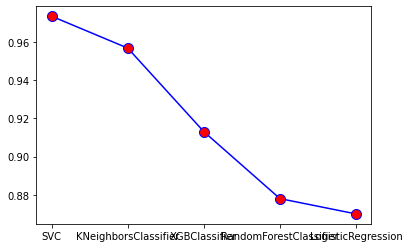

In [109]:
plt.plot(models['models'],models['accuracy'],marker='o',markerfacecolor="red",color="blue",markersize=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

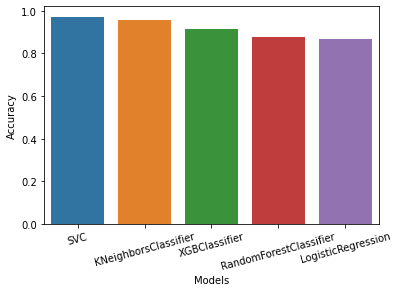

In [117]:
sns.barplot(models['models'],models['accuracy'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)